<a href="https://colab.research.google.com/github/MiTi-alt/ML_TV201/blob/main/Lab_7_mssv_HoTen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [17]:
# code
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_TH_2023'
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML_TH_2023


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [3]:
#code
iris = load_iris()
X = iris.data
y = iris.target
svm = SVC(kernel='linear', C=1, max_iter=-1)
scores = cross_val_score(svm, X, y, cv=5)
mean_score = scores.mean()
print(mean_score)

0.9800000000000001


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [7]:

selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
scores = cross_val_score(rf, X_new, y, cv=5)
mean_score = scores.mean()

print(mean_score)

0.96


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [2]:
# code
mnist = datasets.load_digits()
X = mnist['data']
y= mnist['target']
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.00000000e+00  2.23463687e-02  4.22905028e+00  1.31396648e+01
   1.12681564e+01  2.93854749e+00  3.35195531e-02 -5.55111512e-17
  -1.73472348e-18  8.82681564e-01  1.26201117e+01  1.33687151e+01
   1.14078212e+01  1.13687151e+01  9.60893855e-01  2.77555756e-17
  -8.67361738e-19  3.72625698e+00  1.42122905e+01  5.25139665e+00
   2.10614525e+00  1.21173184e+01  3.53072626e+00  1.04083409e-16
  -1.30104261e-18  5.29608939e+00  1.26424581e+01  2.03351955e+00
   2.29050279e-01  9.07821229e+00  6.47486034e+00 -2.60208521e-18
   0.00000000e+00  5.88268156e+00  1.14916201e+01  8.65921788e-01
   3.35195531e-02  8.81005587e+00  7.15083799e+00  0.00000000e+00
  -1.04083409e-17  3.51396648e+00  1.32849162e+01  1.65921788e+00
   1.49162011e+00  1.13519553e+01  5.84357542e+00 -1.04083409e-17
  -4.33680869e-18  8.04469274e-01  1.31117318e+01  9.96089385e+00
   1.03519553e+01  1.32960894e+01  2.47486034e+00  2.23463687e-02
  -6.50521303e-19  5.58659218e-03  4.19553073e+00  1.35865922e+01
   1.33407

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [10]:
# code
kmeans = KMeans(n_clusters=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results_kmeans = cross_validate(kmeans, X, y, cv=5, scoring=scoring)
results_rf = cross_validate(rf, X, y, cv=5, scoring=scoring)
results_knn = cross_validate(knn, X, y, cv=5, scoring=scoring)
results_nb = cross_validate(nb, X, y, cv=5, scoring=scoring)

mean_scores_kmeans = {k: v.mean() for k, v in results_kmeans.items()}
mean_scores_rf = {k: v.mean() for k, v in results_rf.items()}
mean_scores_knn = {k: v.mean() for k, v in results_knn.items()}
mean_scores_nb = {k: v.mean() for k, v in results_nb.items()}

t = PrettyTable(["algorithms","K-Means","Random Forest","KNN","Naive Bayes"])
t.add_row(["Accuracy",mean_scores_kmeans['test_accuracy'],mean_scores_rf['test_accuracy'],mean_scores_knn['test_accuracy'],mean_scores_nb['test_accuracy']])
t.add_row(["Precision",mean_scores_kmeans['test_precision_macro'],mean_scores_rf['test_precision_macro'],mean_scores_knn['test_precision_macro'],mean_scores_nb['test_precision_macro']])
t.add_row(["Recall",mean_scores_kmeans['test_recall_macro'],mean_scores_rf['test_recall_macro'],mean_scores_knn['test_recall_macro'],mean_scores_nb['test_recall_macro']])
t.add_row(["F1 Score",mean_scores_kmeans['test_f1_macro'],mean_scores_rf['test_f1_macro'],mean_scores_knn['test_f1_macro'],mean_scores_nb['test_f1_macro']])

print(t)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

+------------+---------------------+--------------------+--------------------+--------------------+
| algorithms |       K-Means       |   Random Forest    |        KNN         |    Naive Bayes     |
+------------+---------------------+--------------------+--------------------+--------------------+
|  Accuracy  | 0.12959300526152892 | 0.9393639740018569 | 0.9627282575054161 | 0.8069281956050759 |
| Precision  | 0.12724111132077165 | 0.9436579468023348 | 0.9647105099179404 | 0.834201176196115  |
|   Recall   | 0.12911178039041818 | 0.939312438488909  | 0.9625573220279102 | 0.8070172104877986 |
|  F1 Score  | 0.12498077116640163 | 0.9389828442792153 | 0.9626496370410162 | 0.8053770473028571 |
+------------+---------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [15]:
#code
print('Supervised learning tốt hơn vì MNIST là một vấn đề được nghiên cứu kỹ lưỡng và tương đối đơn giản, và việc học không giám sát có thể rõ ràng hơn trong các bộ dữ liệu phức tạp hơn hoặc ít được hiểu hơn.')

mnist = datasets.load_digits()
X = mnist['data']
y = mnist['target']
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
agg_clustering = AgglomerativeClustering(n_clusters=10)
y_pred = agg_clustering.fit_predict(X_norm)
print(y_pred[:20])


Supervised learning tốt hơn vì MNIST là một vấn đề được nghiên cứu kỹ lưỡng và tương đối đơn giản, và việc học không giám sát có thể rõ ràng hơn trong các bộ dữ liệu phức tạp hơn hoặc ít được hiểu hơn.
[5 1 1 4 8 4 6 9 1 4 5 1 3 4 8 0 6 9 1 4]


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





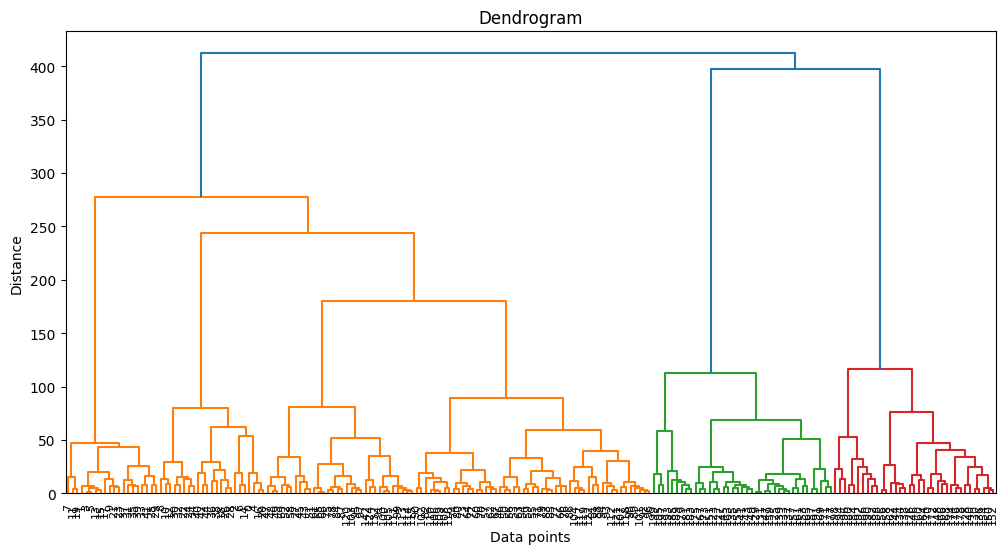

In [18]:
#code

shopping_data = pd.read_csv("shopping-data.csv")
shopping_data = shopping_data.drop(["CustomerID", "Genre"], axis=1)
Z = linkage(shopping_data, 'ward')
plt.figure(figsize=(12, 6))
plt.title("Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

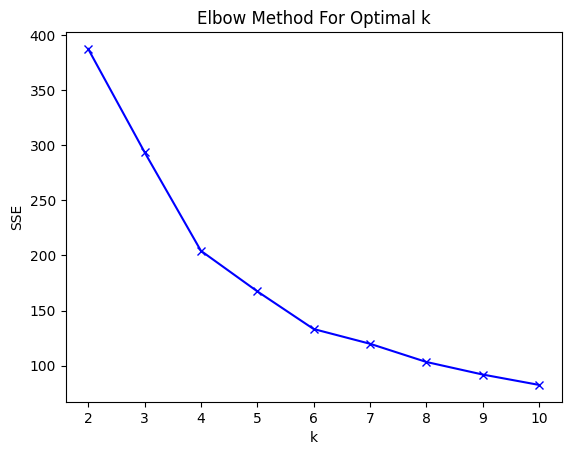

In [20]:
#code


shopping_data = pd.read_csv("shopping-data.csv")
shopping_data = shopping_data.drop(["CustomerID", "Genre"], axis=1)

shopping_data_norm = (shopping_data - shopping_data.mean()) / shopping_data.std()

k_values = list(range(2, 11))
sse_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(shopping_data_norm)
    sse_values.append(kmeans.inertia_)

plt.plot(k_values, sse_values, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [21]:
#code
shopping_data = pd.read_csv("shopping-data.csv")

shopping_data = shopping_data.drop(["CustomerID", "Genre"], axis=1)
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage="ward")
cluster_labels = agg_clustering.fit_predict(shopping_data)
print("Predicted Cluster Labels:\n", cluster_labels)

Predicted Cluster Labels:
 [0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 0 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#Finally,
Save a copy in your Github. Remember renaming the notebook.